# M12 Exercises

DS 5100 | Fall 2023 | Online

In [3]:
# install.packages("tidyverse")

In [1]:
# install.packages("vctrs")

# Import Libraries

In [39]:
library(vctrs)

In [40]:
library(tidyverse)

# Get Data

See [info on the `mpg` dataset](https://ggplot2.tidyverse.org/reference/mpg.html).

In [41]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


# Exercise 12.1

Run `mpg %>% ggplot()` what do you see?

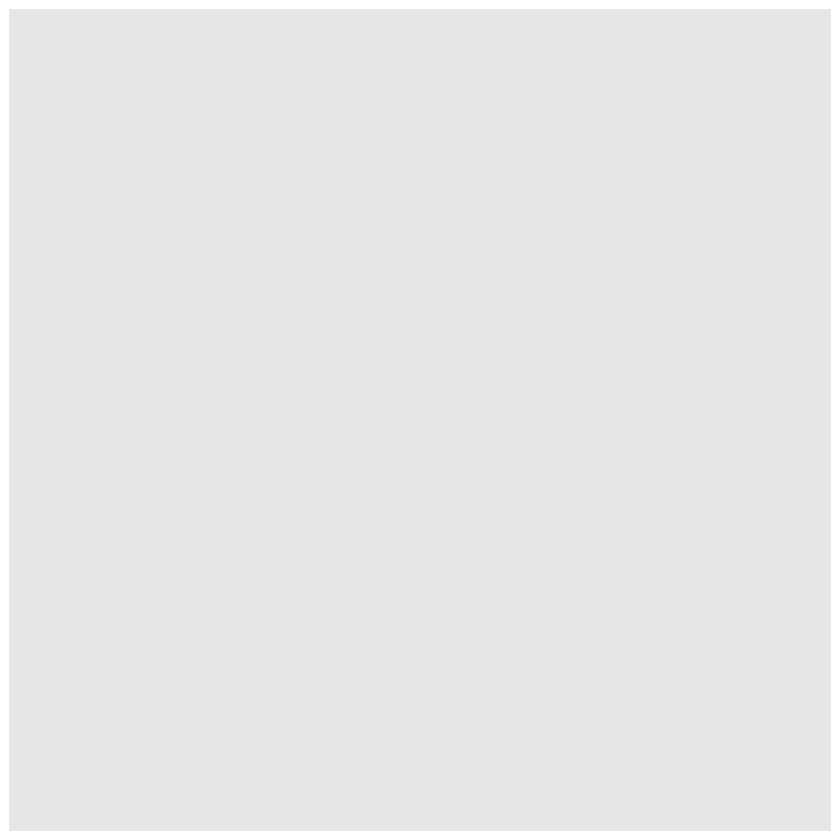

In [42]:
mpg %>% ggplot()

# Exercise 12.2

Make a scatter plot of `hwy` vs. `cyl` in the  `mpg` data set.

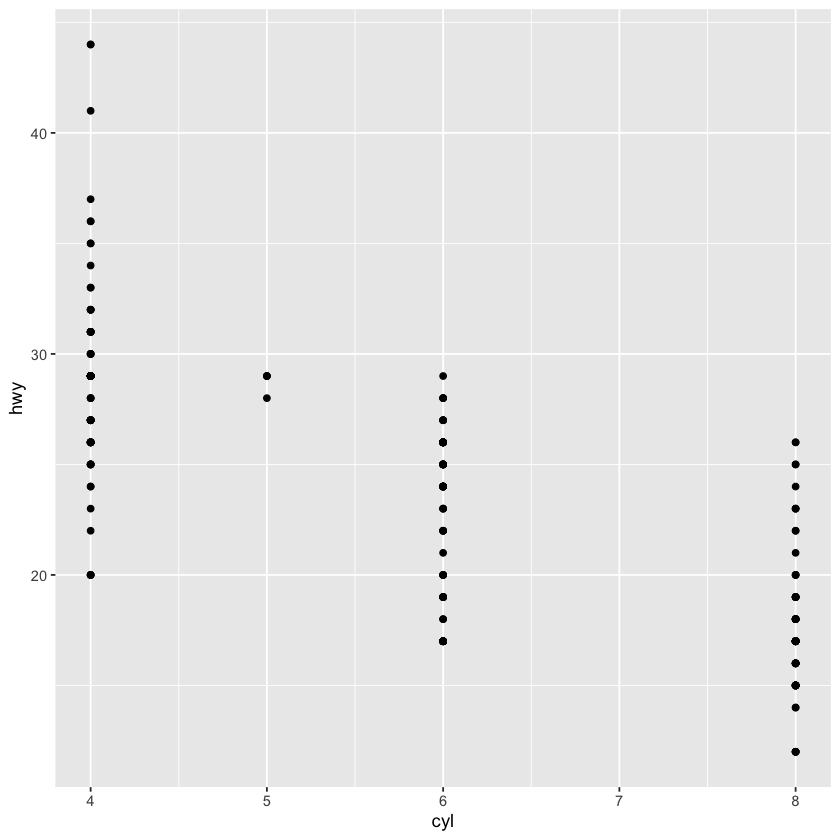

In [43]:
mpg %>%
    ggplot(aes(x = cyl, y = hwy)) +
      geom_point()

 `aes` is actually a value for the `mapping` argument.

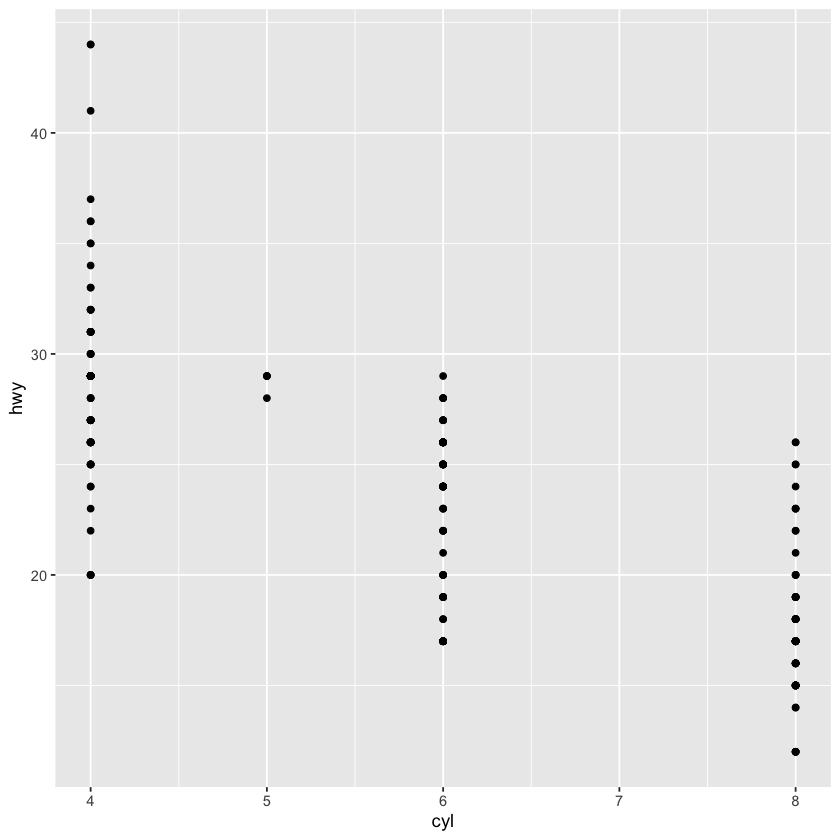

In [68]:
mpg %>%
    ggplot(mapping = aes(x = cyl, y = hwy)) +
      geom_point()

`aes` can also be treated as a separate operation.

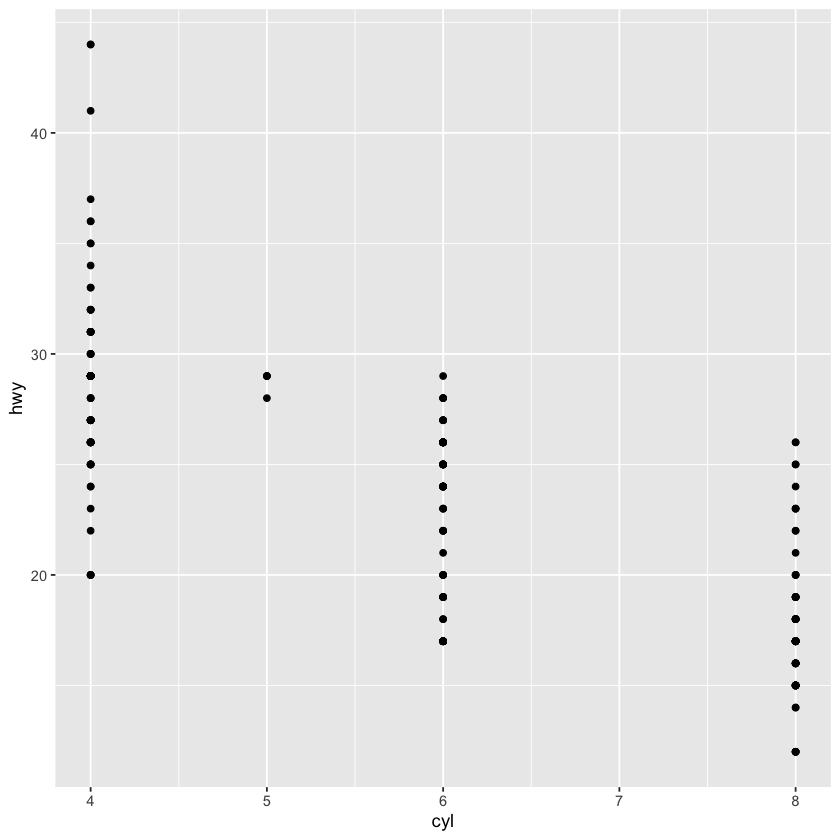

In [127]:
mpg %>%
    ggplot() +
    aes(x = cyl, y = hwy) +
    geom_point()

# Exercise 12.3

What happens if you make a scatter plot of `class` vs `drv`? 

Why is the plot not useful?

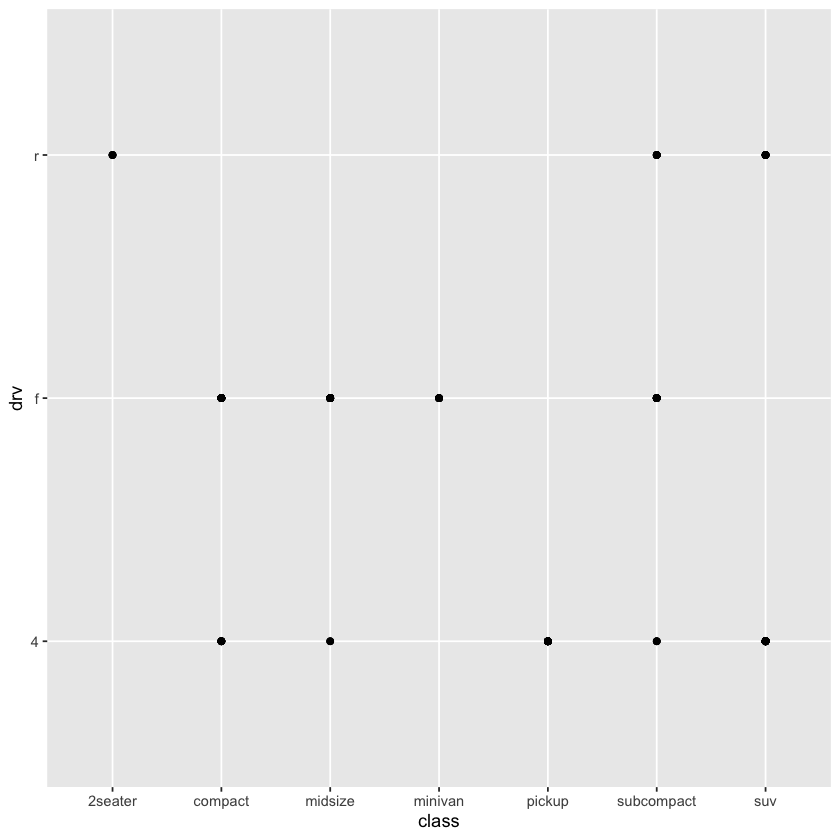

In [57]:
mpg %>% 
    ggplot(aes(x = class, y = drv)) + 
    geom_point()

The resulting scatterplot has only a few points.

A scatter plot is not a useful display of these variables since both `drv` and `class` are categorical variables. 

Since categorical variables typically take a small number of values, there are a limited number of unique combinations of $(x, y)$ values that can be displayed. 

In this data, `drv` takes $3$ values and `class` takes $7$ values, meaning that there are only $21$ values that could be plotted on a scatterplot of `drv` vs. `class`. 

In this data, there $12$ values of (`drv`, `class`) are observed.

# Exercise 12.4

Plot the mathematical function $sin(x)/x$.

Hint: Use this to create your data and convert to a data frame or tibble:

```r
x <- seq(-6*pi, 6*pi, length.out = 100)
```

In [58]:
x <- seq(-6*pi, 6*pi, length.out = 100)
dat <- data.frame(x = x, y = sin(x)/x)
head(dat)

,x,y
,<dbl>,<dbl>
1,-18.84956,-3.898172e-17
2,-18.46876,-2.012385e-02
3,-18.08796,-3.815130e-02
4,-17.70716,-5.137086e-02
5,-17.32636,-5.765016e-02
6,-16.94556,-5.576687e-02


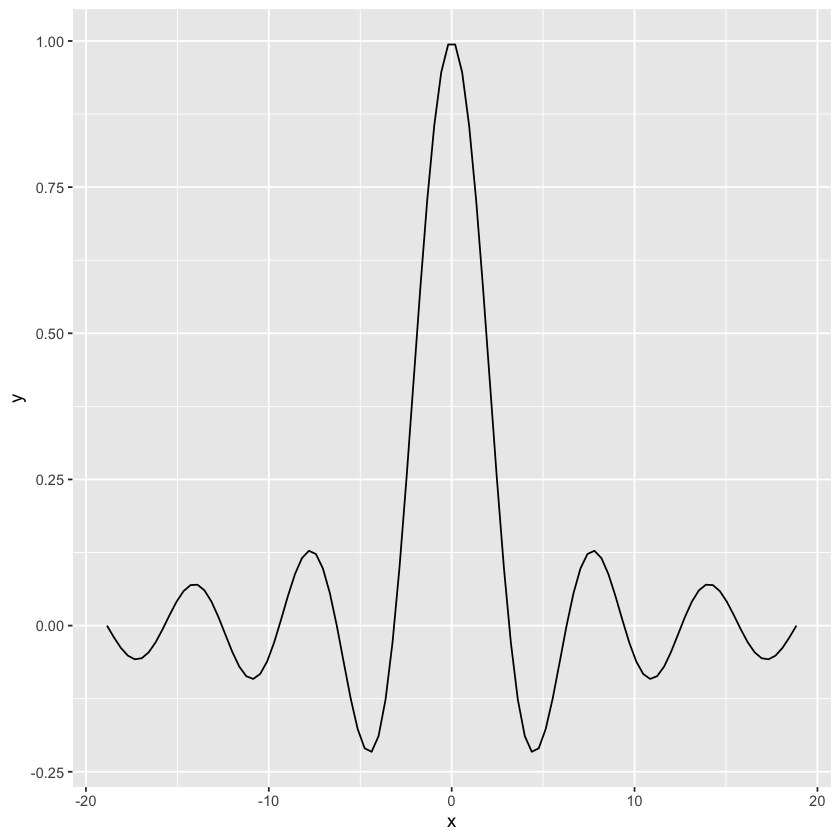

In [59]:
ggplot(data = dat, 
    mapping = aes(x = x, y = y)) + 
    geom_line()

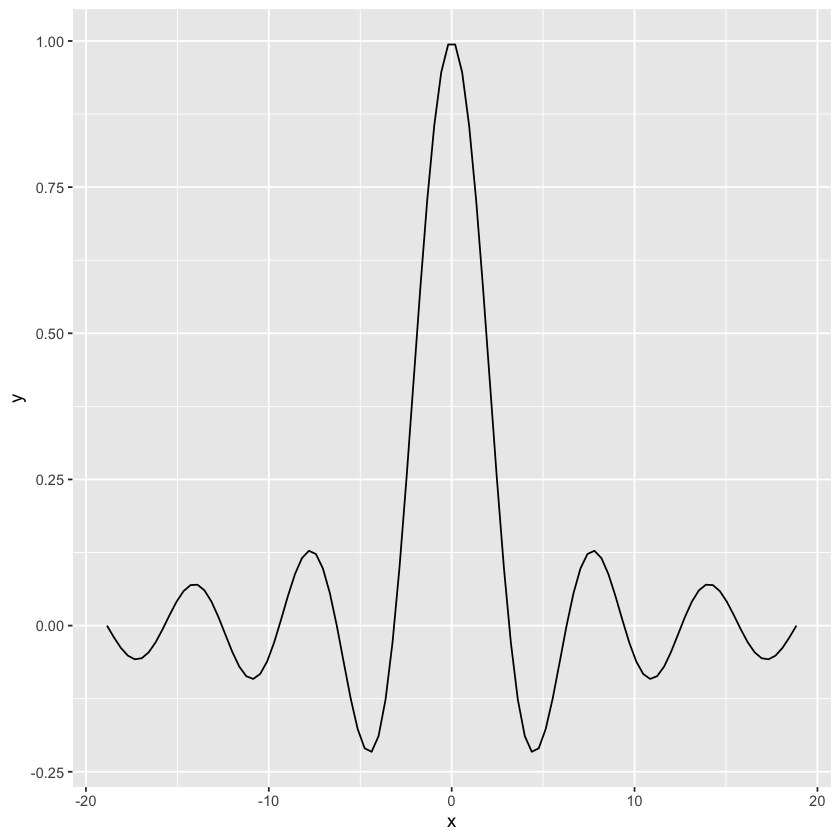

In [60]:
dat %>% 
    ggplot(aes(x = x, y = y)) + 
    geom_line()

# Exercise 12.5

Plot the `cars` data set as a scatter plot using `speed` vs `dist`.

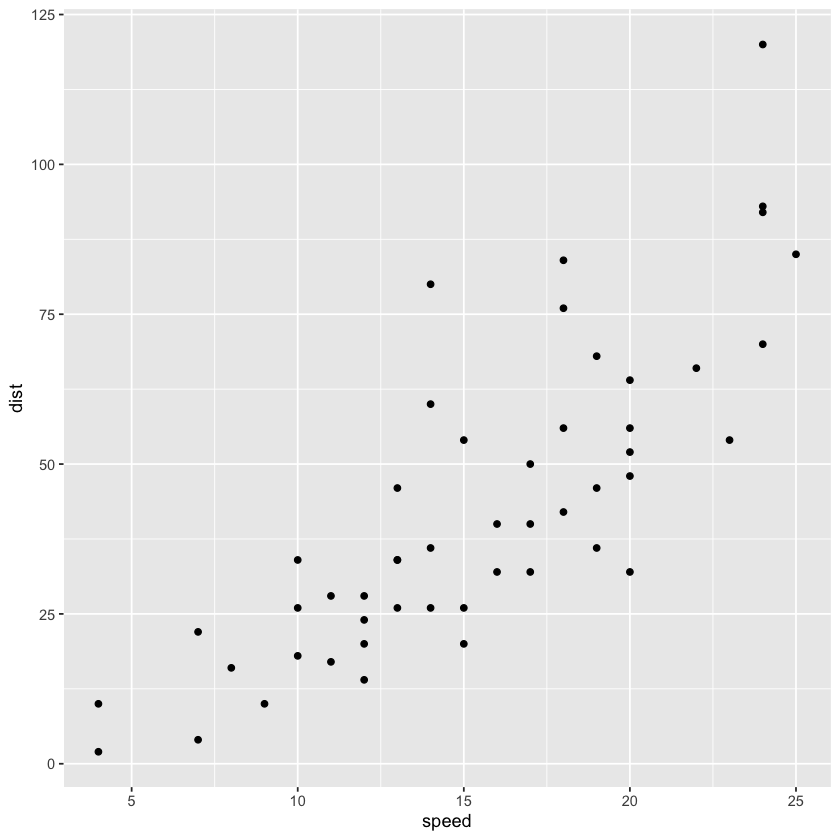

In [61]:
cars %>% 
    ggplot(aes(x = speed, y = dist)) +
    geom_point()

# Exercise 12.6

Create the same plot plot, this time using color to distinguish data points with distances taken to stop greater than $80$.

In [62]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


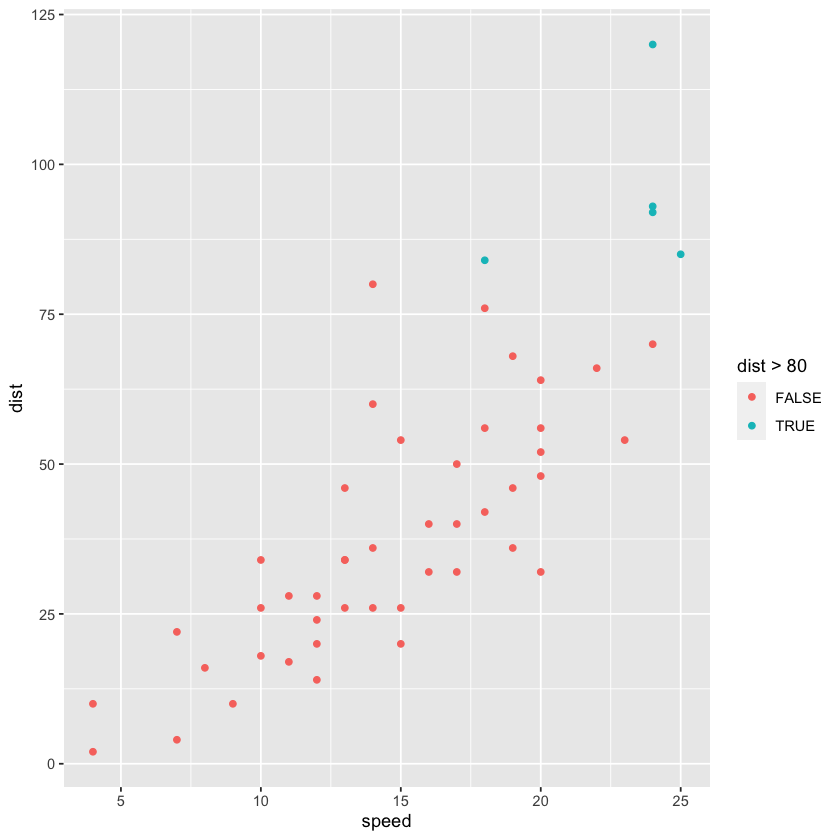

In [63]:
cars %>%
    ggplot(aes(x = speed, y = dist)) +
    geom_point(mapping = aes(color = dist > 80))

# Exercise 12.7

Change the plot so that values > 80 are in red and the other in blue.

Hint: Define the colors using a manual color scale in `scale_color_manual()`.

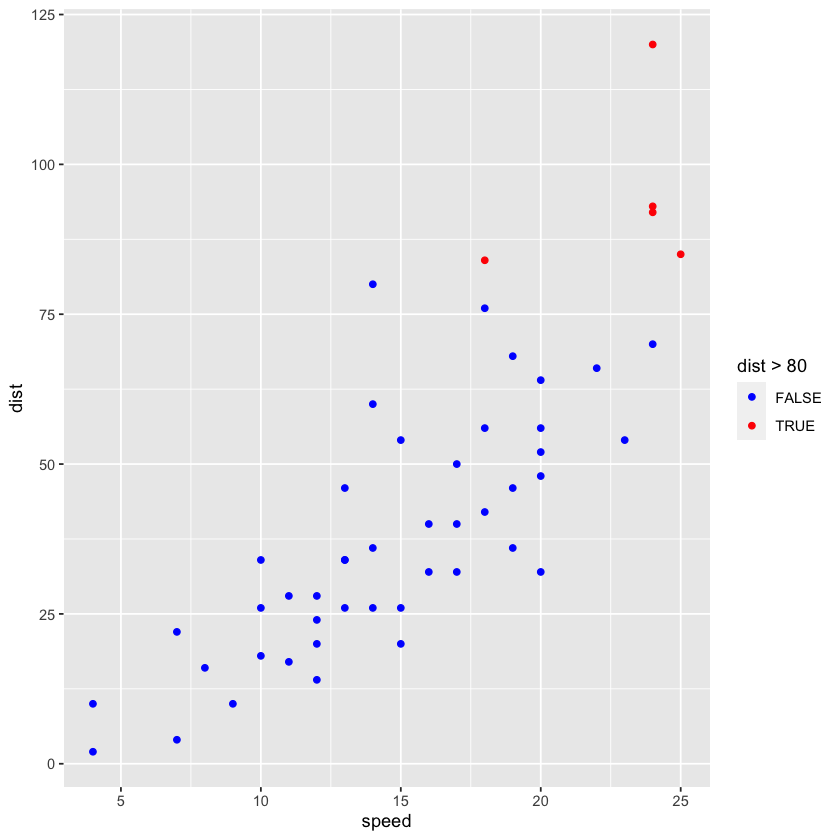

In [64]:
cars %>%
    ggplot(aes(x = speed, y = dist)) + 
    geom_point(mapping = aes(color = dist > 80)) + 
    scale_color_manual(values = c("blue", "red"))

Another way, using `ifelse()`:

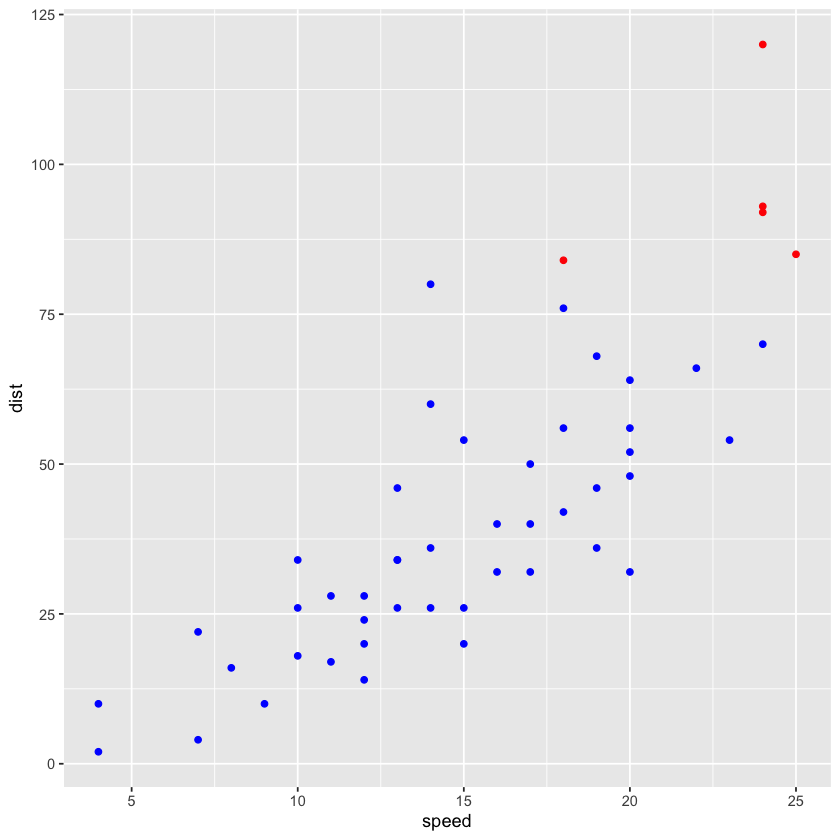

In [65]:
cars %>%
    ggplot(aes(speed, dist)) + 
    geom_point(color = ifelse(cars$dist > 80, 'red', 'blue'))

# Exercise 12.8

Add a second `geom` that produces a smoothed line.

Use `lm` as your smoothing method.

Hint: Add `geom_smooth()` to your graphic.

`geom_smooth()` using formula 'y ~ x'



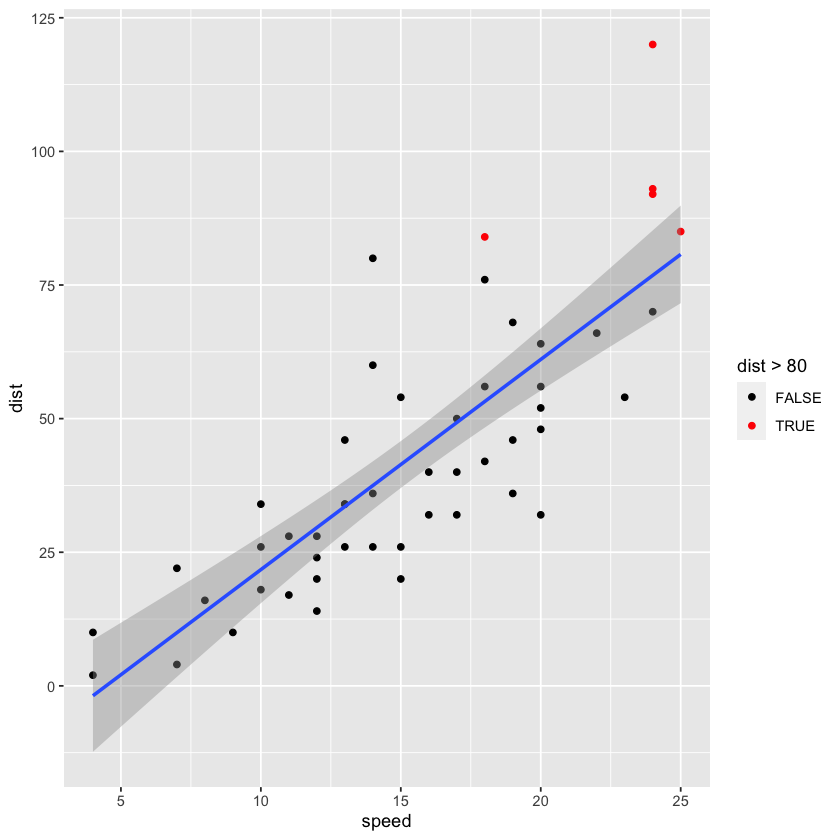

In [77]:
cars %>%
    ggplot(aes(x = speed, y = dist)) + 
      geom_point(aes(color = dist > 80)) + 
      scale_color_manual(values = c("black", "red")) +
      geom_smooth(method = 'lm')

Smoothing method (function) to use includes: lm, glm, gam, loess, rlm.

loess: locally weighted smoothing

`geom_smooth()` using formula 'y ~ x'



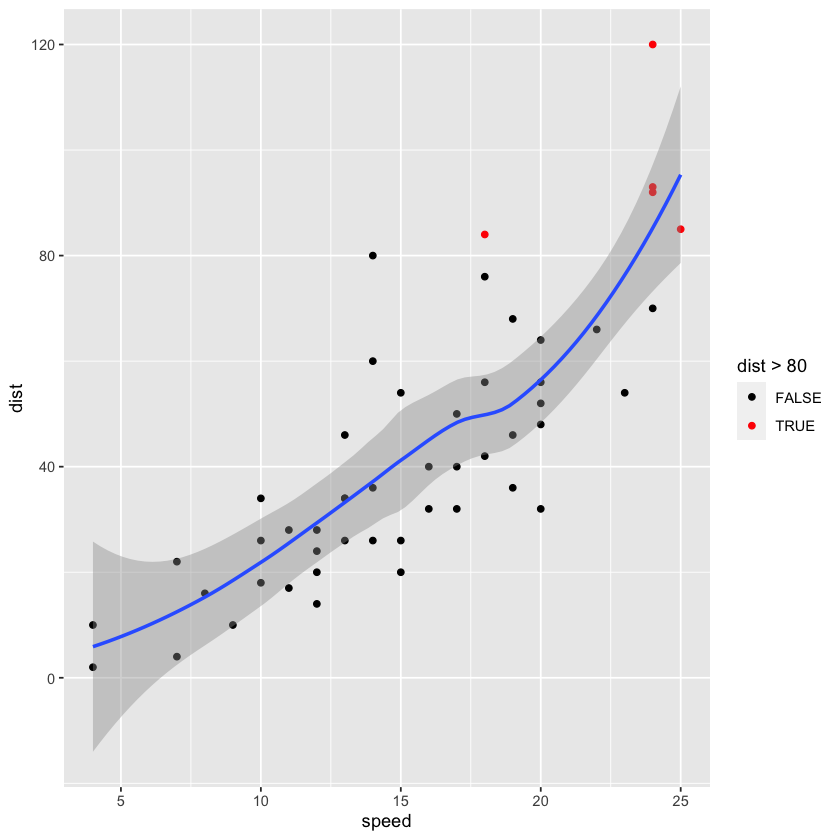

In [78]:
cars %>%
    ggplot(aes(x = speed, y = dist)) + 
      geom_point(aes(color = dist > 80)) + 
      scale_color_manual(values = c("black", "red")) +
      geom_smooth(method = 'loess')

# Exercise 12.9

Plot histograms for `speed` and `dist` in `cars`.

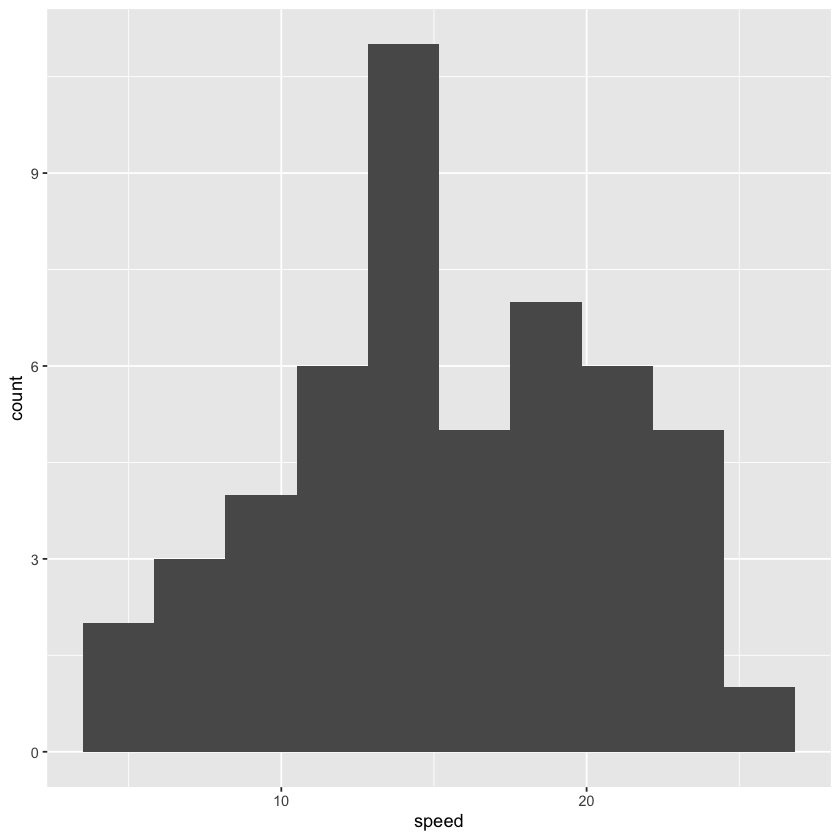

In [82]:
cars %>%
    ggplot(aes(x = speed)) + 
    geom_histogram(bins = 10)

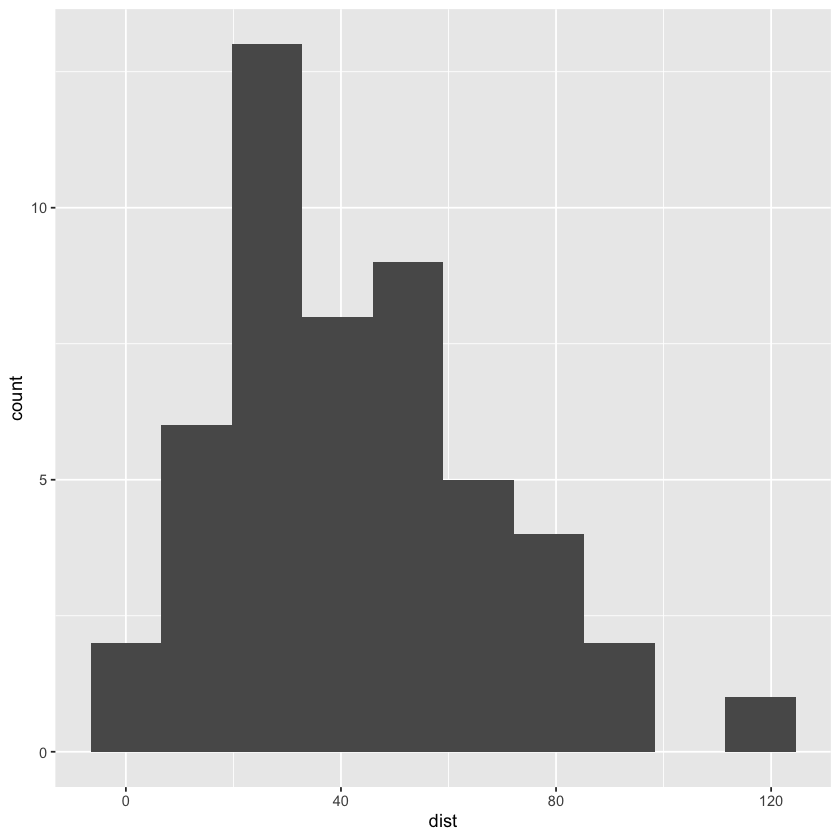

In [83]:
cars %>%
    ggplot(aes(x = dist)) + 
    geom_histogram(bins = 10)

# Exercise 12.10

Create a faceted plot of a scatterplot of `hwy` and `cty` of the `mpg` with `drv` as rows and  `cyl` as cols.

What do the empty cells mean?

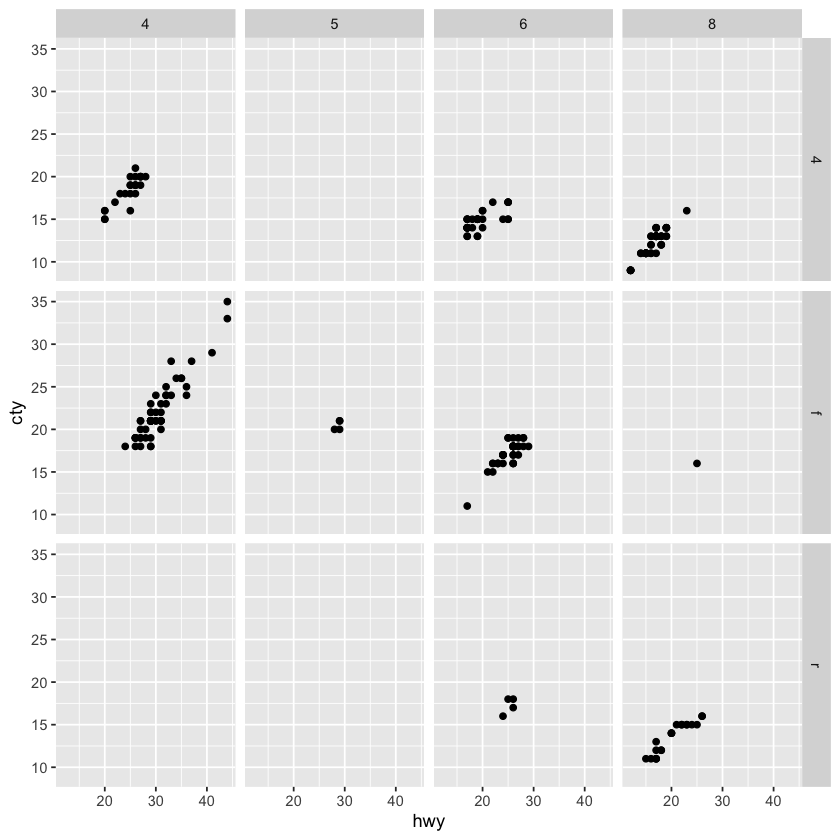

In [84]:
mpg %>% 
    ggplot() +
      geom_point(aes(x = hwy, y = cty)) +
      facet_grid(drv ~ cyl)

The empty cells (facets) in this plot are combinations of drv and cyl that have no observations. 

These are the same locations in the scatter plot of drv and cyl that have no points.

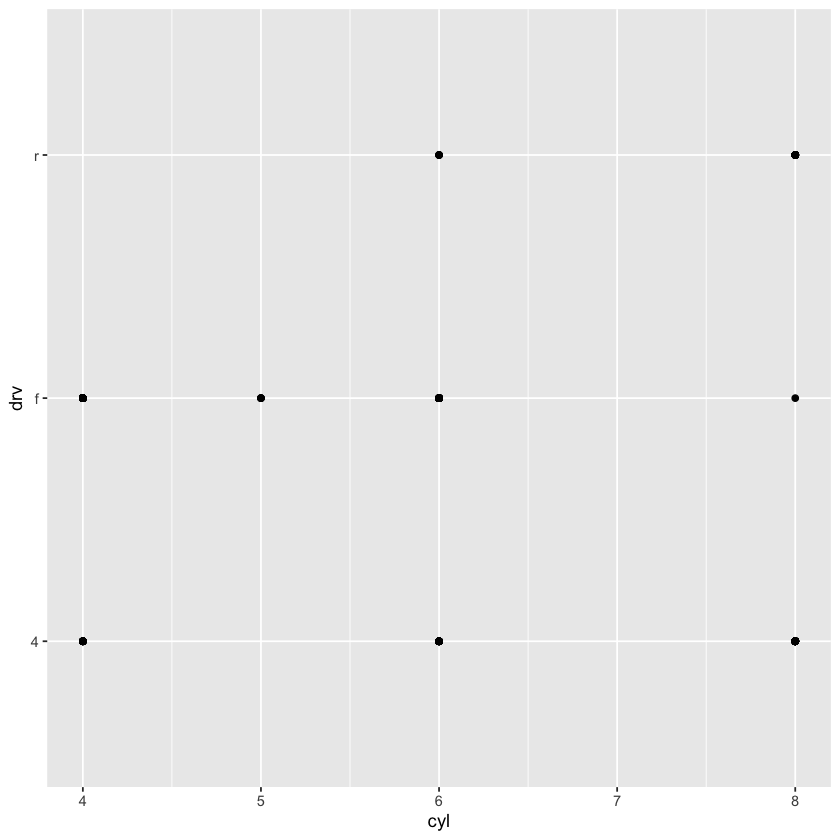

In [113]:
mpg %>% 
    ggplot() +
      geom_point(aes(y = drv, x = cyl))

Without faceting:

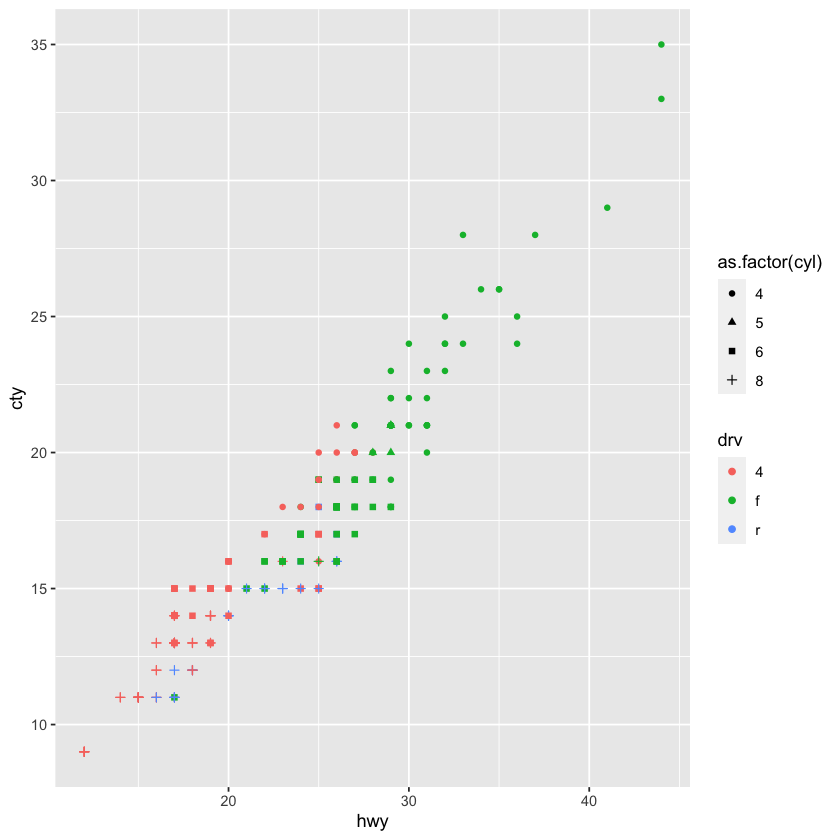

In [124]:
mpg %>% 
    ggplot() +
      geom_point(aes(x = hwy, y = cty, 
                     color=drv, 
                     shape=as.factor(cyl)))

# Exercise 12.11

Reproduce this graphic from the iris dataset:

![](https://www.r-exercises.com/wp-content/uploads/2018/02/ggplot-exercises-1.png)

Hint: This graphic uses two geometries, one title, and one theme function. 

One of the geometries is `geom_density2d()` and the theme function is `theme_light()`.

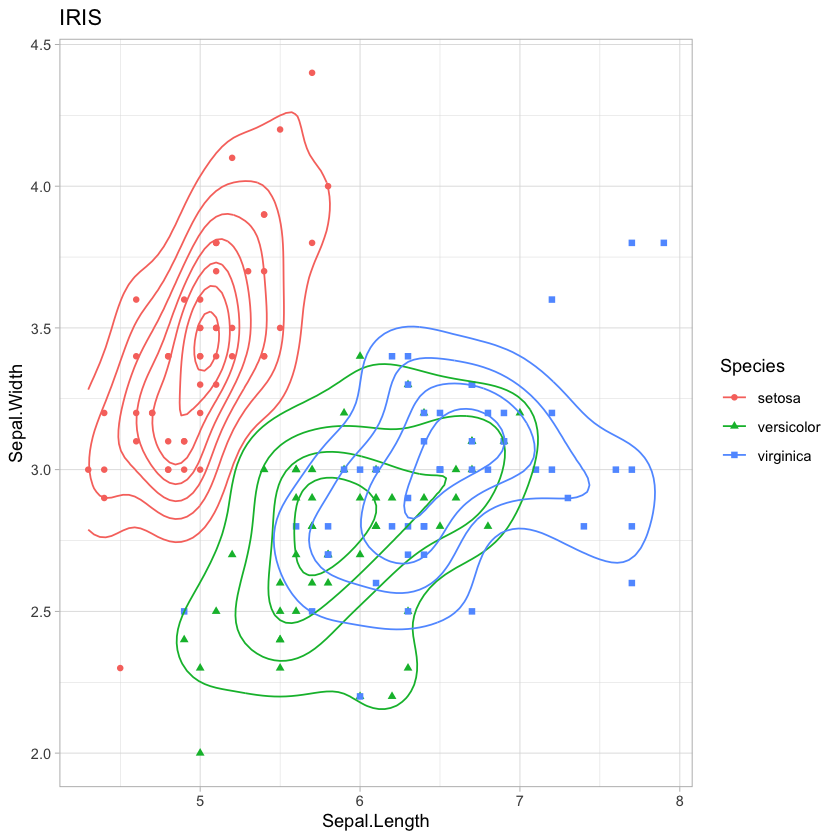

In [100]:
iris %>%
  ggplot(aes(x = Sepal.Length, y = Sepal.Width, color = Species, shape = Species)) +
  geom_point() +
  geom_density2d() +
  ggtitle('IRIS') +
  theme_light()

# Exercise 12.12

Reproduce this graphc from the iris dataset:

![](https://www.r-exercises.com/wp-content/uploads/2018/02/ggplot-exercises-2.png)

Hints: 

(1) Preprocess your data as follows:

```{r}
iris %>%
  mutate(Species = 'ALL') %>%   # Create a copy of iris where Species has only 'ALL'
  bind_rows(iris)               # concatenate to the original iris
```

(2) This graphic uses faceting with `facet_wrap()` and theme function `theme_bw()`.

`geom_smooth()` using formula 'y ~ x'



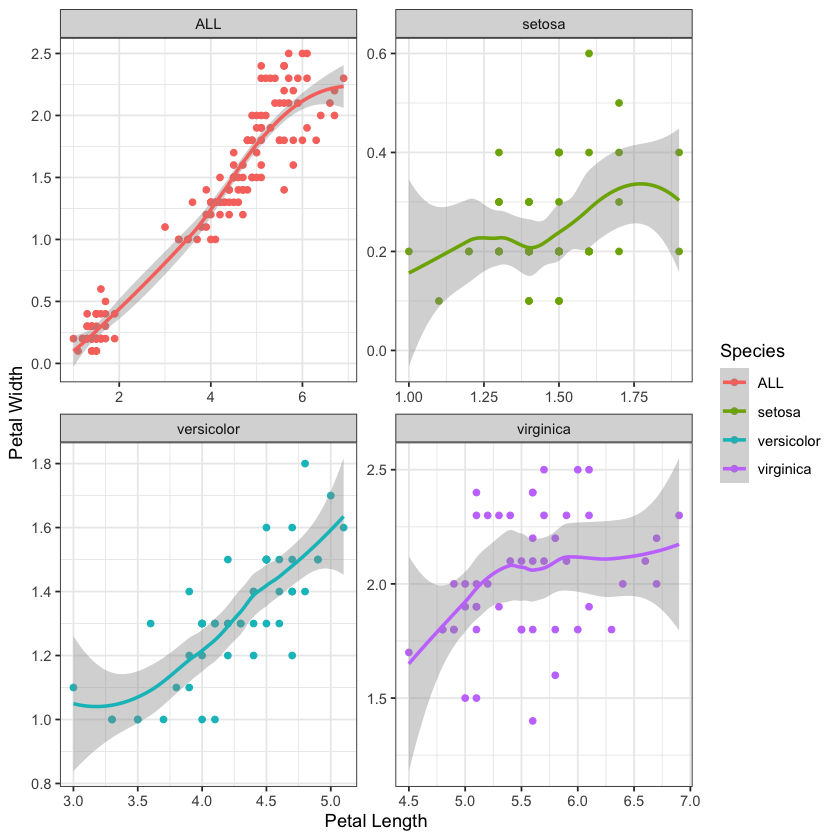

In [101]:
iris %>%
  mutate(Species = 'ALL') %>%
  bind_rows(iris) %>%
  ggplot(aes(x = Petal.Length, y = Petal.Width, color = Species)) +
      geom_point() +
      geom_smooth(method = 'loess') +
      xlab('Petal Length') +
      ylab('Petal Width') +
      facet_wrap(~Species, scales = 'free') +
      theme_bw()

# Exercise 12.13

Reproduce this graphic using the mtcars dataset:

<!-- ![](assets/ggplot-exercises-3.png) -->

![](https://www.r-exercises.com/wp-content/uploads/2018/02/ggplot-exercises-3.png)

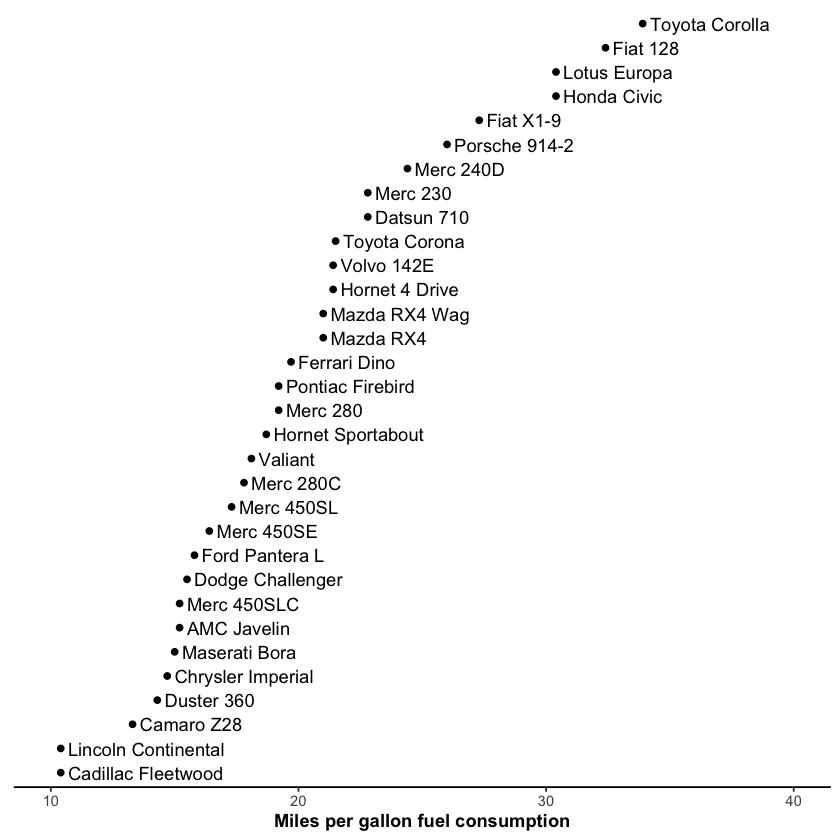

In [21]:
mtcars %>%
  rownames_to_column() %>%
  mutate(rowname = forcats::fct_reorder(rowname, mpg)) %>%
  ggplot(aes(rowname, mpg, label = rowname)) +
  geom_point() +
  geom_text(nudge_y = .3, hjust = 'left') +
  coord_flip() +
  ylab('Miles per gallon fuel consumption') +
  ylim(10, 40) +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0, size = 16),
        axis.title.x = element_text(face = 'bold'),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.line.y = element_blank())

# Exercises 12.14

Reproduce this graphic using the mtcars dataset: \
![](https://www.r-exercises.com/wp-content/uploads/2018/02/ggplot-exercises-4.png)
<!-- https://www.r-exercises.com/wp-content/uploads/2018/02/ggplot-exercises-4.png -->


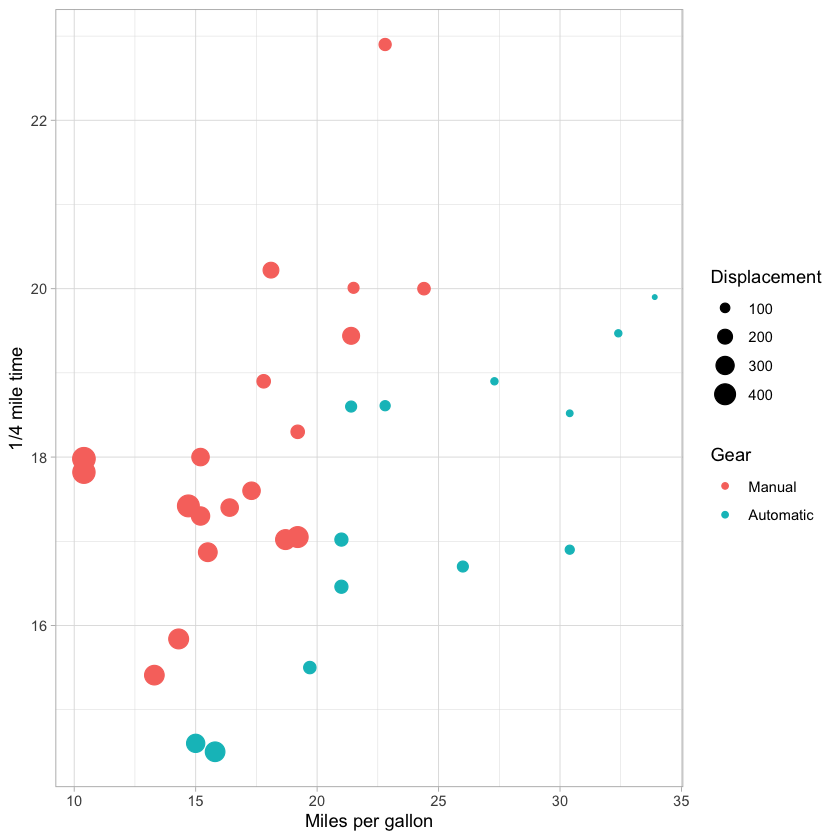

In [22]:
mtcars %>%
  ggplot(aes(x = mpg, y = qsec, size = disp, color = as.factor(am))) +
  geom_point() +
  scale_colour_discrete(name  ="Gear",
                        breaks=c(0, 1),
                        labels=c("Manual", "Automatic")) +
  scale_size_continuous(name = 'Displacement') +
  xlab('Miles per gallon') +
  ylab('1/4 mile time') +
  theme_light()

# Exercise 12.15

Reproduce this image using the diamonds dataset:

<!-- NOT SURE WHY THESE LINKS FAIL: -->
![](https://www.r-exercises.com/wp-content/uploads/2018/02/ggplot-exercises-5.png)

https://www.r-exercises.com/wp-content/uploads/2018/02/ggplot-exercises-5.png

`summarise()` has grouped output by 'cut'. You can override using the `.groups` argument.


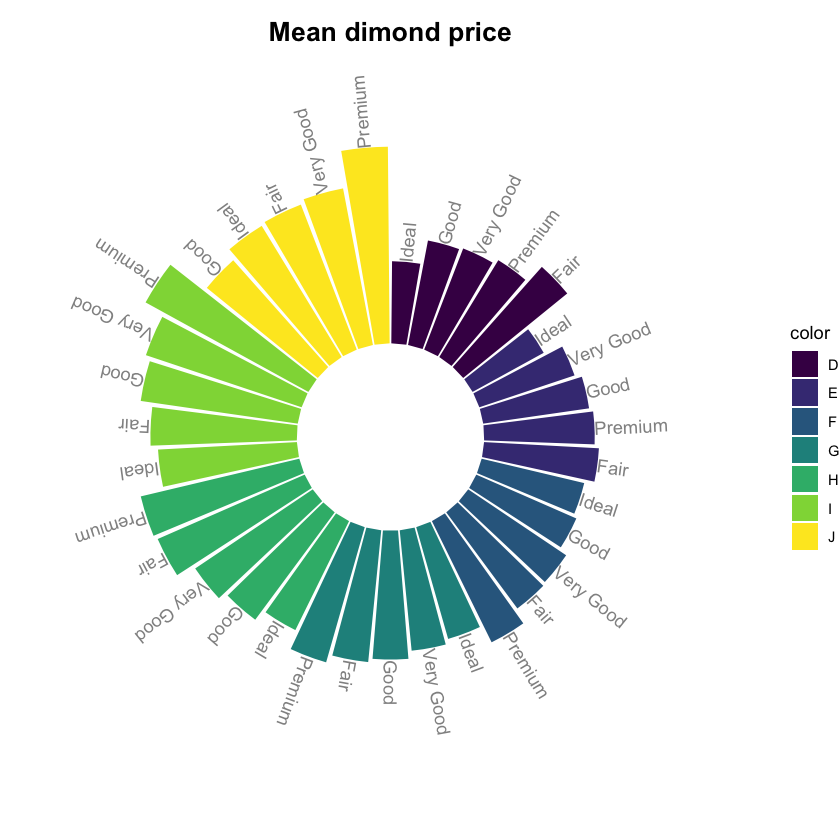

In [125]:
diamonds2plot <- diamonds %>%
  group_by(cut, color) %>%
  summarise(price = mean(price)) %>%
  arrange(color, price) %>%
  ungroup() %>%
  mutate(id = row_number(), 
         angle = 90 - 360 * (id - 0.5) / n())

diamonds2plot  %>%
  ggplot(aes(factor(id), price, fill = color, group = cut, label = cut)) +
  geom_bar(stat = 'identity', position = 'dodge') +
  geom_text(hjust = 0, angle = diamonds2plot$angle, alpha = .5) +
  coord_polar() +
  ggtitle('Mean dimond price') +
  ylim(-3000, 7000) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'))

Sources: [A](https://michael.hahsler.net/SMU/DS_Workshop_Intro_R/slides/4_Plots_ggplot_Solution.html) [B](https://www.r-exercises.com/2018/02/23/practice-you-ggplot-skills-exercises/) [C](https://jrnold.github.io/r4ds-exercise-solutions/data-visualisation.html)

In [104]:
# mtcars